## Business Problem

SCE is a power utilities participant that serves load for 15 million Californians in the California deregulated energy market (called the CAISO),meaning that everyday SCE buys and sells energy in the market in order to meet the demand of its customers. Having accurate load forecasts for SCE. Most of the forecasted load is bought 14 hours before the start of the "flow date" in the "day- ahead" energy market. The flow date is defined as the day the energy is consumed by our customers. The rest of the load is bought in the "real time" energy market in order to hit real time  uxes of demand. The load forecast accuracy is crucial for SCE in order to keep costs down for SCE customers and to be able to balance supply and demand on the grid. SCE aims to predict the Load with a model yielding a mean absolute percentage error (MAPE) of under 4% for our 14-hour forecast in order to accurately purchase electricity in the "day-ahead" market.

## Libraries

In [200]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [201]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## Mean Absolute Percentage Error Function

In [202]:
def mean_absolute_percentage_error(y,y_pred):
    y = np.array(y)
    y_pred = np.array(y_pred)
    return 100*np.mean(np.abs((y-y_pred)/y))

## Read sce.csv file

In [203]:
df = pd.read_csv('sce_Van.csv')
df[:10]

,Date,Load,temp
0,1/1/14 0:00,9891.0,59.4685
1,1/1/14 1:00,9553.0,61.4030
2,1/1/14 2:00,9222.0,55.0310
3,1/1/14 3:00,9024.0,53.1878
4,1/1/14 4:00,8987.0,51.9944
5,1/1/14 5:00,9028.0,50.0450
6,1/1/14 6:00,9136.0,48.5402
7,1/1/14 7:00,8882.0,47.8121
8,1/1/14 8:00,9020.0,46.7744
9,1/1/14 9:00,9180.0,46.0895


## Create Columns for year, month, day, hour and dayofweek. Fitted a multiple regression model with all predictors and with month, day, hour, day of week as categorical variables.

In [204]:
df['Date'] = pd.to_datetime(df['Date']) # Converting Date to datetime

df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month.astype('object')
df['day'] = df['Date'].dt.day.astype('object')
df['hour'] = df['Date'].dt.hour.astype('object')
df['day_of_week'] = df['Date'].dt.dayofweek.astype('object')
df[:5]

,Date,Load,temp,year,month,day,hour,day_of_week
0,2014-01-01 00:00:00,9891.0,59.4685,2014,1,1,0,2
1,2014-01-01 01:00:00,9553.0,61.4030,2014,1,1,1,2
2,2014-01-01 02:00:00,9222.0,55.0310,2014,1,1,2,2
3,2014-01-01 03:00:00,9024.0,53.1878,2014,1,1,3,2
4,2014-01-01 04:00:00,8987.0,51.9944,2014,1,1,4,2


In [205]:
df.dtypes

Date           datetime64[ns]
Load                  float64
temp                  float64
year                    int64
month                  object
day                    object
hour                   object
day_of_week            object
dtype: object

In [206]:
model1 = smf.ols(formula='Load ~ year + month + day + hour + day_of_week ',data = df).fit()
df['prediction1'] = model1.predict(df)

In [207]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Load   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     1897.
Date:                Tue, 19 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:47:12   Log-Likelihood:            -4.2839e+05
No. Observations:               49680   AIC:                         8.569e+05
Df Residuals:                   49608   BIC:                         8.576e+05
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.236e+05   7482.767     29.878      0.000    2.09e+05    2.38e+05
month[T.2]        -157.6576     29.272     -5.386      0.000    -215.030    -100.285
month[T.3]        -181.3029     28.488     -6.364      0.000    -237.140    -125.466
month[T.4]          -2.0339     28.760     -0.071      0.944     -58.404      54.336
month[T.5]         322.3307     28.488     11.315      0.000     266.495     378.167
month[T.6]        1925.0989     28.760     66.937      0.000    1868.729    1981.469
month[T.7]        3734.7270     28.488    131.098      0.000    3678.890    3790.564
month[T.8]        3915.8621     28.488    137.458      0.000    3860.026    3971.699
month[T.9]        2849.9100     30.181     94.428      0.000    2790.755    2909.065
month[T.10]       1216.5810     29.936     40.639      0.000    1157.906    1275.256
month[T.11]         46.8105     30.239      1.548      0.122     -12.459     106.080
month[T.12]        176.6725     29.936      5.902      0.000     117.997     235.348
day[T.2]            65.2297     46.947      1.389      0.165     -26.786     157.246
day[T.3]           -17.4502     46.946     -0.372      0.710    -109.464      74.564
day[T.4]          -181.7149     46.947     -3.871      0.000    -273.731     -89.699
day[T.5]          -126.2456     46.947     -2.689      0.007    -218.262     -34.229
day[T.6]           -48.3082     46.947     -1.029      0.303    -140.324      43.708
day[T.7]            20.0680     46.947      0.427      0.669     -71.948     112.084
day[T.8]           103.9167     46.946      2.214      0.027      11.903     195.931
day[T.9]           124.1015     46.947      2.643      0.008      32.085     216.118
day[T.10]          118.6028     46.946      2.526      0.012      26.589     210.617
day[T.11]           99.7074     46.947      2.124      0.034       7.691     191.723
day[T.12]           73.0348     46.947      1.556      0.120     -18.981     165.051
day[T.13]           95.8191     46.947      2.041      0.041       3.803     187.835
day[T.14]           95.0909     46.947      2.026      0.043       3.075     187.107
day[T.15]           79.9453     46.946      1.703      0.089     -12.069     171.959
day[T.16]           45.1299     46.947      0.961      0.336     -46.886     137.146
day[T.17]           -2.6733     46.946     -0.057      0.955     -94.687      89.341
day[T.18]          -69.7235     46.947     -1.485      0.138    -161.740      22.293
day[T.19]          -19.3168     46.947     -0.411      0.681    -111.333      72.699
day[T.20]           57.1106     46.947      1.216      0.224     -34.905     149.127
day[T.21]           32.7462     46.947      0.698      0.485     -59.270     124.762
day[T.22]          -10.7298     46.946     -0.229      0.819    -102.744      81.284
day[T.23]           -1.

In [208]:
print("R-square for model1 is ",model1.rsquared)

R-square for model1 is  0.7308342402827882


In [209]:
MAPE = mean_absolute_percentage_error(df.Load,df.prediction1)
print("MAPE for model1 is",MAPE)

MAPE for model1 is 8.069690607999425


##  Plot of Load vs temp with the x-axis displaying the years

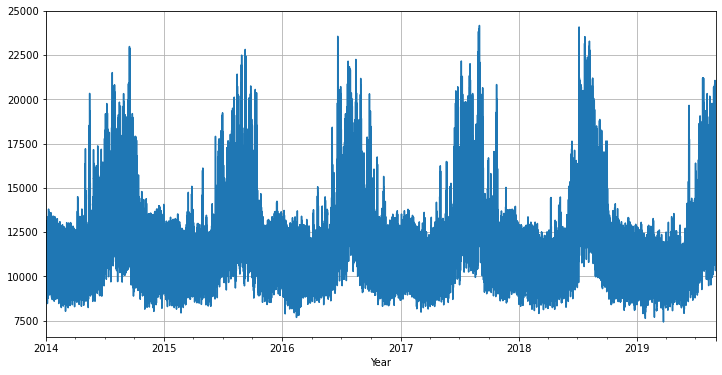

In [210]:
df= df.set_index('Date') # Change the index to Date to plot Load as a function of time
plt.figure(figsize = (12,6))
df.Load.plot()
plt.xlabel('Year')
plt.grid();

## Scatterplot of Load vs temp with the x-axis displaying the temp. 

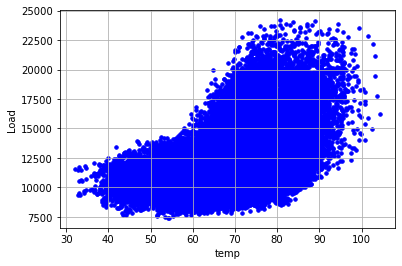

In [211]:
plt.scatter(df['temp'],df['Load'], c='b',s=12)
plt.xlabel('temp')
plt.ylabel('Load')
plt.grid();

In [212]:
df1 = df.sort_values('temp') ### Creating a new data frame df1 to put the sorted values on the basis of temprature
df1[:5]

,Load,temp,year,month,day,hour,day_of_week,prediction1
Date,,,,,,,,
2015-12-28 14:00:00,11591.0,32.1602,2015,12,28,14,0,12606.025559
2015-12-28 13:00:00,11460.0,32.8433,2015,12,28,13,0,12306.483444
2015-01-01 13:00:00,9391.0,32.8955,2015,1,1,13,3,12202.597440
2015-01-02 14:00:00,10509.0,32.9927,2015,1,2,14,4,12449.952767
2015-01-01 15:00:00,9494.0,33.1340,2015,1,1,15,3,12763.935685


In [213]:
# Separating the Predictor and Response
temp = df1['temp']
Load = df1['Load']

In [214]:
temp.shape

(49680,)

In [215]:
temp1 = temp.values.reshape(-1,1)
temp1.shape

(49680, 1)

### Polynomial Regression- Quadratic Model

In [216]:
poly2 = PolynomialFeatures(degree = 2)
temp2 = poly2.fit_transform(temp1)
temp2[:5]

array([[1.00000000e+00, 3.21602000e+01, 1.03427846e+03],
       [1.00000000e+00, 3.28433000e+01, 1.07868235e+03],
       [1.00000000e+00, 3.28955000e+01, 1.08211392e+03],
       [1.00000000e+00, 3.29927000e+01, 1.08851825e+03],
       [1.00000000e+00, 3.31340000e+01, 1.09786196e+03]])

In [217]:
df2= pd.DataFrame(temp2)
df2[:5]

,0,1,2
0,1.0,32.1602,1034.278464
1,1.0,32.8433,1078.682355
2,1.0,32.8955,1082.113920
3,1.0,32.9927,1088.518253
4,1.0,33.1340,1097.861956


In [218]:
model2 = LinearRegression().fit(df2,Load)
yhat2 = model2.predict(df2)
yhat2

array([11764.82450633, 11681.94399047, 11675.73785512, ...,
       19750.46653813, 19913.95143276, 20096.96649422])

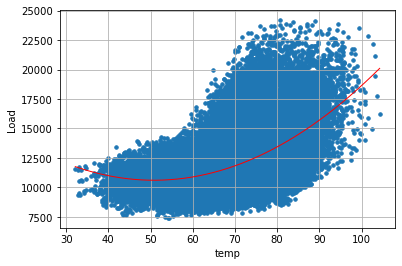

In [219]:
plt.scatter(temp, Load,s=12)
plt.plot(temp,yhat2,c='r', lw = 1)
plt.xlabel('temp')
plt.ylabel('Load')
plt.grid();

### Added a quadratic least squares (red) line on the plot. This plot suggests that the square of temp is a good predictor of the Load and that it should be included in the following models

## Fitted a multiple regression model by adding to the first model the temperature squared, the interaction of temperature and hour, and, the interaction of squared temperature and hour.

In [220]:
df['temp_sq']=df['temp'] ** 2 ## Add square of temprature to our main dataframe df
df[:5]

,Load,temp,year,month,day,hour,day_of_week,prediction1,temp_sq
Date,,,,,,,,,
2014-01-01 00:00:00,9891.0,59.4685,2014,1,1,0,2,9918.880255,3536.502492
2014-01-01 01:00:00,9553.0,61.4030,2014,1,1,1,2,9436.421064,3770.328409
2014-01-01 02:00:00,9222.0,55.0310,2014,1,1,2,2,9118.871381,3028.410961
2014-01-01 03:00:00,9024.0,53.1878,2014,1,1,3,2,8960.476921,2828.942069
2014-01-01 04:00:00,8987.0,51.9944,2014,1,1,4,2,9053.230022,2703.417631


In [221]:
model3 = smf.ols(formula='Load ~  year + month + day + hour + day_of_week \
                                + temp_sq + temp * hour + temp_sq * hour',data = df).fit()
df['prediction2'] = model3.predict(df)

In [222]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Load   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     3687.
Date:                Tue, 19 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:47:34   Log-Likelihood:            -4.0416e+05
No. Observations:               49680   AIC:                         8.086e+05
Df Residuals:                   49560   BIC:                         8.096e+05
Df Model:                         119                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.141e+05   4761.884     44.957      0.000    2.05e+05    2.23e+05
month[T.2]          -182.6570     18.036    -10.127      0.000    -218.008    -147.306
month[T.3]          -236.9964     18.342    -12.921      0.000    -272.947    -201.046
month[T.4]          -279.1917     19.430    -14.369      0.000    -317.275    -241.108
month[T.5]          -155.5985     19.725     -7.889      0.000    -194.259    -116.938
month[T.6]           581.7252     22.131     26.285      0.000     538.347     625.103
month[T.7]          1319.5374     24.543     53.764      0.000    1271.433    1367.642
month[T.8]          1516.2622     24.586     61.671      0.000    1468.073    1564.452
month[T.9]           882.5152     24.072     36.661      0.000     835.333     929.698
month[T.10]          208.0304     21.831      9.529      0.000     165.241     250.820
month[T.11]          -23.6435     19.421     -1.217      0.223     -61.708      14.421
month[T.12]          176.5232     18.416      9.585      0.000     140.428     212.619
day[T.2]              82.6795     28.842      2.867      0.004      26.148     139.211
day[T.3]              13.3143     28.845      0.462      0.644     -43.223      69.851
day[T.4]             -22.9317     28.864     -0.794      0.427     -79.505      33.642
day[T.5]              72.6998     28.878      2.517      0.012      16.098     129.301
day[T.6]              97.8182     28.880      3.387      0.001      41.213     154.424
day[T.7]              79.7538     28.863      2.763      0.006      23.183     136.325
day[T.8]             112.2900     28.872      3.889      0.000      55.700     168.880
day[T.9]             102.8092     28.888      3.559      0.000      46.188     159.431
day[T.10]            155.3912     28.879      5.381      0.000      98.787     211.995
day[T.11]            157.4030     28.895      5.447      0.000     100.769     214.037
day[T.12]            167.3792     28.884      5.795      0.000     110.767     223.992
day[T.13]            151.5144     28.882      5.246      0.000      94.906     208.123
day[T.14]            149.4521     28.890      5.173      0.000      92.828     206.076
day[T.15]             88.7346     28.886      3.072      0.002      32.118     145.351
day[T.16]             65.7948     28.887      2.278      0.023       9.177     122.413
day[T.17]             86.6180     28.879      2.999      0.003      30.016     143.221
day[T.18]             77.9038     28.878      2.698      0.007      21.303     134.504
day[T.19]             86.8631     28.868      3.009      0.003      30.281     143.445
day[T.20]             52.2629     28.855      1.811      0.070      -4.294     108.820
day[T.21]             75.5061     28.865      2.616      0.009      18.930     132.082
day[T.22]             66.7062     28.8

In [223]:
print("R-square for model3 is ",model3.rsquared)

R-square for model3 is  0.8985126605893211


In [224]:
MAPE = mean_absolute_percentage_error(df.Load,df.prediction2)
print(MAPE)

5.171918662670458


## Added the Lag of Load shifted to 24 hours as an additional predictor.

In [225]:
df['lag24'] = df['Load'].shift(24) ## Added a Lag of 24 hrs to the main dataframe
df[:25]

,Load,temp,year,month,day,hour,day_of_week,prediction1,temp_sq,prediction2,lag24
Date,,,,,,,,,,,
2014-01-01 00:00:00,9891.0,59.4685,2014,1,1,0,2,9918.880255,3536.502492,10385.982918,NaN
2014-01-01 01:00:00,9553.0,61.4030,2014,1,1,1,2,9436.421064,3770.328409,9833.076333,NaN
2014-01-01 02:00:00,9222.0,55.0310,2014,1,1,2,2,9118.871381,3028.410961,9843.968668,NaN
2014-01-01 03:00:00,9024.0,53.1878,2014,1,1,3,2,8960.476921,2828.942069,9812.090217,NaN
2014-01-01 04:00:00,8987.0,51.9944,2014,1,1,4,2,9053.230022,2703.417631,10007.600336,NaN
2014-01-01 05:00:00,9028.0,50.0450,2014,1,1,5,2,9468.725377,2504.502025,10632.944186,NaN
2014-01-01 06:00:00,9136.0,48.5402,2014,1,1,6,2,10056.192500,2356.151016,11503.965786,NaN
2014-01-01 07:00:00,8882.0,47.8121,2014,1,1,7,2,10454.321309,2285.996906,11761.200739,NaN
2014-01-01 08:00:00,9020.0,46.7744,2014,1,1,8,2,10799.307892,2187.844495,11799.570593,NaN


In [226]:
model4 = smf.ols(formula='Load ~ temp_sq + year + month + day + hour + day_of_week\
                                + temp * hour + temp_sq * hour + lag24',data = df).fit()
df['prediction3'] = model4.predict(df)

In [227]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Load   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     6578.
Date:                Tue, 19 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:47:50   Log-Likelihood:            -3.9052e+05
No. Observations:               49656   AIC:                         7.813e+05
Df Residuals:                   49535   BIC:                         7.824e+05
Df Model:                         120                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           9.218e+04   3693.840     24.956      0.000    8.49e+04    9.94e+04
month[T.2]           -90.4349     13.785     -6.560      0.000    -117.454     -63.416
month[T.3]          -101.0505     14.025     -7.205      0.000    -128.539     -73.562
month[T.4]          -121.9727     14.858     -8.209      0.000    -151.095     -92.851
month[T.5]           -81.5896     15.063     -5.417      0.000    -111.113     -52.067
month[T.6]           199.8247     17.009     11.748      0.000     166.487     233.162
month[T.7]           421.1436     19.321     21.797      0.000     383.275     459.013
month[T.8]           462.6263     19.571     23.638      0.000     424.267     500.986
month[T.9]           191.5086     18.729     10.225      0.000     154.800     228.217
month[T.10]          -16.1077     16.703     -0.964      0.335     -48.846      16.631
month[T.11]          -19.7848     14.828     -1.334      0.182     -48.848       9.279
month[T.12]           61.6095     14.079      4.376      0.000      34.014      89.205
day[T.2]             120.7136     22.084      5.466      0.000      77.428     163.999
day[T.3]              -8.9270     22.084     -0.404      0.686     -52.212      34.358
day[T.4]             -62.9541     22.097     -2.849      0.004    -106.265     -19.643
day[T.5]             108.2402     22.110      4.895      0.000      64.904     151.577
day[T.6]             126.9684     22.111      5.742      0.000      83.631     170.306
day[T.7]             108.0249     22.098      4.888      0.000      64.713     151.337
day[T.8]             128.0017     22.104      5.791      0.000      84.677     171.326
day[T.9]              84.9274     22.114      3.840      0.000      41.583     128.272
day[T.10]             94.3631     22.109      4.268      0.000      51.029     137.697
day[T.11]             90.8766     22.120      4.108      0.000      47.521     134.233
day[T.12]             92.7109     22.113      4.193      0.000      49.368     136.054
day[T.13]            112.6834     22.110      5.096      0.000      69.347     156.020
day[T.14]             97.3033     22.117      4.400      0.000      53.955     140.652
day[T.15]             60.0054     22.113      2.714      0.007      16.663     103.347
day[T.16]             40.0282     22.113      1.810      0.070      -3.313      83.370
day[T.17]             45.4737     22.108      2.057      0.040       2.141      88.806
day[T.18]             35.7719     22.107      1.618      0.106      -7.559      79.103
day[T.19]            106.0018     22.102      4.796      0.000      62.682     149.322
day[T.20]             99.0703     22.094      4.484      0.000      55.765     142.375
day[T.21]             51.2958     22.098      2.321      0.020       7.983      94.608
day[T.22]             39.0712     22.0

In [228]:
print("R-square for model4 is ",model4.rsquared)

R-square for model4 is  0.9409536275105141


In [229]:
df.shape

(49680, 12)

In [230]:
df3 = df.dropna() ## Drop the NaN's so as to calculate the MAPE accurately
df3.shape

(49656, 12)

In [231]:
MAPE = mean_absolute_percentage_error(df3.Load,df3.prediction3)
print("MAPE for model4 is",MAPE)

MAPE for model4 is 3.8437939643434906


## Plot partial autocorrelations. Lags with a large partial autocorrelations (+ or -) should be good predictors. 

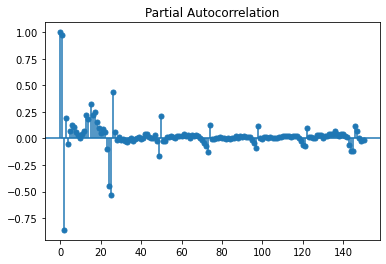

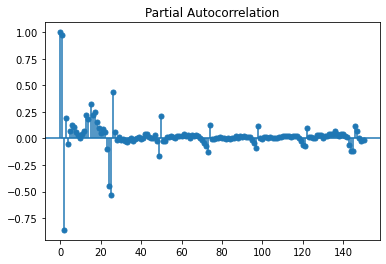

In [232]:
sm.graphics.tsa.plot_pacf(df.Load, lags = 150)

In [233]:
df['lag15'] = df['Load'].shift(15)
df['lag16'] = df['Load'].shift(16)
df['lag17'] = df['Load'].shift(17)
df['lag25'] = df['Load'].shift(25)
df['lag26'] = df['Load'].shift(26)
df['lag27'] = df['Load'].shift(27)
df['lag48'] = df['Load'].shift(48)
df['lag49'] = df['Load'].shift(49)
df['lag50'] = df['Load'].shift(50)
df['lag74'] = df['Load'].shift(74)
df['lag98'] = df['Load'].shift(98)
df['lag120'] = df['Load'].shift(120)
df['lag121'] = df['Load'].shift(121)
df['lag139'] = df['Load'].shift(139)
df['lag140'] = df['Load'].shift(140)
df['lag141'] = df['Load'].shift(141)
df['lag142'] = df['Load'].shift(142)
df['lag143'] = df['Load'].shift(143)

df[:5]

,Load,temp,year,month,day,hour,day_of_week,prediction1,temp_sq,prediction2,...,lag50,lag74,lag98,lag120,lag121,lag139,lag140,lag141,lag142,lag143
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,9891.0,59.4685,2014,1,1,0,2,9918.880255,3536.502492,10385.982918,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 01:00:00,9553.0,61.4030,2014,1,1,1,2,9436.421064,3770.328409,9833.076333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 02:00:00,9222.0,55.0310,2014,1,1,2,2,9118.871381,3028.410961,9843.968668,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 03:00:00,9024.0,53.1878,2014,1,1,3,2,8960.476921,2828.942069,9812.090217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 04:00:00,8987.0,51.9944,2014,1,1,4,2,9053.230022,2703.417631,10007.600336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [234]:
model5 = smf.ols(formula='Load ~  temp_sq + year + month + day + hour + day_of_week\
                                + temp * hour + temp_sq * hour +  lag15 + lag16 + lag17\
                                + lag24 + lag25 + lag26 + lag27 + lag48\
                                + lag49 + lag50 + lag74 + lag98 + lag120 + lag121 + lag139 + lag140 + lag141 \
                                + lag142 + lag143',data = df).fit()
df['prediction4'] = model5.predict(df)

In [235]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Load   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     6614.
Date:                Tue, 19 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:48:14   Log-Likelihood:            -3.8615e+05
No. Observations:               49537   AIC:                         7.726e+05
Df Residuals:                   49398   BIC:                         7.738e+05
Df Model:                         138                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           7.693e+04   3525.881     21.819      0.000       7e+04    8.38e+04
month[T.2]           -80.1347     12.968     -6.179      0.000    -105.552     -54.717
month[T.3]           -84.7939     13.212     -6.418      0.000    -110.690     -58.898
month[T.4]          -108.0660     13.985     -7.727      0.000    -135.477     -80.655
month[T.5]           -71.4396     14.178     -5.039      0.000     -99.229     -43.650
month[T.6]           165.4937     16.200     10.216      0.000     133.742     197.245
month[T.7]           324.4129     19.365     16.752      0.000     286.457     362.369
month[T.8]           331.4730     20.106     16.486      0.000     292.064     370.882
month[T.9]           105.6311     18.761      5.630      0.000      68.859     142.403
month[T.10]          -60.0351     15.999     -3.752      0.000     -91.393     -28.677
month[T.11]          -28.5507     13.941     -2.048      0.041     -55.875      -1.227
month[T.12]           55.4217     13.238      4.187      0.000      29.476      81.368
day[T.2]              94.7377     20.693      4.578      0.000      54.179     135.297
day[T.3]             -43.3586     20.701     -2.094      0.036     -83.934      -2.784
day[T.4]             -70.0802     20.707     -3.384      0.001    -110.665     -29.495
day[T.5]              94.8246     20.722      4.576      0.000      54.208     135.441
day[T.6]              73.9096     20.737      3.564      0.000      33.264     114.555
day[T.7]              83.5472     20.645      4.047      0.000      43.083     124.012
day[T.8]              93.0934     20.649      4.508      0.000      52.622     133.565
day[T.9]              39.9425     20.665      1.933      0.053      -0.561      80.446
day[T.10]             81.2320     20.645      3.935      0.000      40.768     121.696
day[T.11]             76.2808     20.652      3.694      0.000      35.803     116.759
day[T.12]             77.2863     20.644      3.744      0.000      36.823     117.750
day[T.13]             96.0305     20.639      4.653      0.000      55.579     136.483
day[T.14]             63.7662     20.650      3.088      0.002      23.291     104.241
day[T.15]             30.3047     20.645      1.468      0.142     -10.160      70.769
day[T.16]             14.3265     20.643      0.694      0.488     -26.133      54.786
day[T.17]             19.2069     20.640      0.931      0.352     -21.247      59.661
day[T.18]             14.1938     20.636      0.688      0.492     -26.253      54.641
day[T.19]             86.4592     20.633      4.190      0.000      46.019     126.900
day[T.20]             64.2533     20.634      3.114      0.002      23.811     104.696
day[T.21]             19.7229     20.638      0.956      0.339     -20.728      60.174
day[T.22]             22.8129     20.6

In [236]:
print("R-square for model5 is ",model5.rsquared)

R-square for model5 is  0.9486596837214306


In [237]:
df.shape

(49680, 31)

In [238]:
df4 = df.dropna() ## Drop the NaN's so to calculate the MAPE accurately
df4.shape

(49537, 31)

In [239]:
MAPE = mean_absolute_percentage_error(df4.Load,df4.prediction4)
print("MAPE for model5 is",MAPE)

MAPE for model5 is 3.5796844133582124


##  Split the data into a test set (2019 load values) and a train set (all other years). Fit the best model from above.

In [240]:
test = df.loc[df['year'] == 2019]
train = df.loc[df['year'] != 2019]

In [241]:
model6 = smf.ols(formula='Load ~  temp_sq + year + month + day + hour + day_of_week \
                                 + temp * hour + temp_sq * hour +  lag15 + lag16 + lag17 \
                                 + lag24 + lag25 + lag26 + lag27 + lag48 \
                                 + lag49 + lag50 + lag74 + lag98 + lag120 + lag121 + lag139 + lag140+ lag141 \
                                + lag142 + lag143',data = train).fit()
df['prediction_test'] = model6.predict(test)

In [242]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Load   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     5849.
Date:                Tue, 19 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:48:26   Log-Likelihood:            -3.4060e+05
No. Observations:               43681   AIC:                         6.815e+05
Df Residuals:                   43542   BIC:                         6.827e+05
Df Model:                         138                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4.874e+04   4165.899     11.701      0.000    4.06e+04    5.69e+04
month[T.2]           -93.8241     14.367     -6.531      0.000    -121.983     -65.665
month[T.3]           -92.8299     14.563     -6.375      0.000    -121.373     -64.287
month[T.4]          -119.8328     15.297     -7.834      0.000    -149.815     -89.850
month[T.5]           -64.1986     15.574     -4.122      0.000     -94.725     -33.673
month[T.6]           209.3121     17.694     11.829      0.000     174.631     243.993
month[T.7]           382.3547     21.093     18.127      0.000     341.013     423.697
month[T.8]           380.3181     21.695     17.530      0.000     337.795     422.841
month[T.9]           127.9259     19.738      6.481      0.000      89.240     166.612
month[T.10]          -55.7803     16.850     -3.310      0.001     -88.806     -22.754
month[T.11]          -41.2240     14.625     -2.819      0.005     -69.888     -12.559
month[T.12]           43.7026     13.856      3.154      0.002      16.544      70.861
day[T.2]              72.8377     22.193      3.282      0.001      29.339     116.336
day[T.3]             -54.7638     22.196     -2.467      0.014     -98.269     -11.258
day[T.4]             -85.4205     22.206     -3.847      0.000    -128.944     -41.897
day[T.5]              60.5736     22.233      2.724      0.006      16.997     104.151
day[T.6]              65.3307     22.251      2.936      0.003      21.719     108.942
day[T.7]              88.5258     22.138      3.999      0.000      45.135     131.917
day[T.8]              84.6399     22.149      3.821      0.000      41.228     128.052
day[T.9]              26.0682     22.172      1.176      0.240     -17.388      69.525
day[T.10]             44.6798     22.141      2.018      0.044       1.283      88.077
day[T.11]             49.8570     22.153      2.251      0.024       6.436      93.278
day[T.12]             70.0729     22.133      3.166      0.002      26.691     113.455
day[T.13]             97.2844     22.128      4.397      0.000      53.914     140.655
day[T.14]             32.2493     22.143      1.456      0.145     -11.151      75.649
day[T.15]             32.1931     22.140      1.454      0.146     -11.202      75.588
day[T.16]              8.3991     22.134      0.379      0.704     -34.984      51.782
day[T.17]             18.2605     22.128      0.825      0.409     -25.110      61.631
day[T.18]              7.2371     22.118      0.327      0.744     -36.114      50.588
day[T.19]             84.4570     22.118      3.818      0.000      41.106     127.808
day[T.20]             71.2652     22.118      3.222      0.001      27.914     114.616
day[T.21]              9.1633     22.129      0.414      0.679     -34.210      52.537
day[T.22]             18.2142     22.1

In [243]:
df_test = df.dropna()

In [244]:
MAPE = mean_absolute_percentage_error(df_test.Load,df_test.prediction_test)
print("MAPE for test_set is",MAPE)

MAPE for test_set is 3.959635219110201


##  Plot the cumulative load by year and month to display the seasonality of the data.

In [143]:
pivot = df.pivot_table('Load', index='month' ,columns='year', aggfunc=sum)

In [144]:
pivot

year,2014,2015,2016,2017,2018,2019
month,,,,,,
1,8.125121e+06,7.948139e+06,7.890403e+06,8241383.80,7.893475e+06,7674611.0
2,7.115328e+06,7.069667e+06,7.203334e+06,7169334.00,7.078015e+06,7044857.0
3,7.880222e+06,8.251539e+06,7.970582e+06,7772633.70,7.599821e+06,7426485.1
4,7.834732e+06,7.826198e+06,7.918706e+06,7649655.82,7.468079e+06,7463246.8
5,8.938985e+06,8.034828e+06,8.235517e+06,8369397.86,8.038964e+06,7594325.0
6,9.067417e+06,9.219019e+06,9.732516e+06,9432457.70,8.735698e+06,8294990.0
7,1.076457e+07,9.941227e+06,1.089069e+07,11050385.50,1.168318e+07,10077470.4
8,1.048651e+07,1.077403e+07,1.086740e+07,11100572.50,1.147829e+07,10520454.9
9,1.022190e+07,1.034573e+07,9.378533e+06,9607095.63,9.343093e+06,335328.0


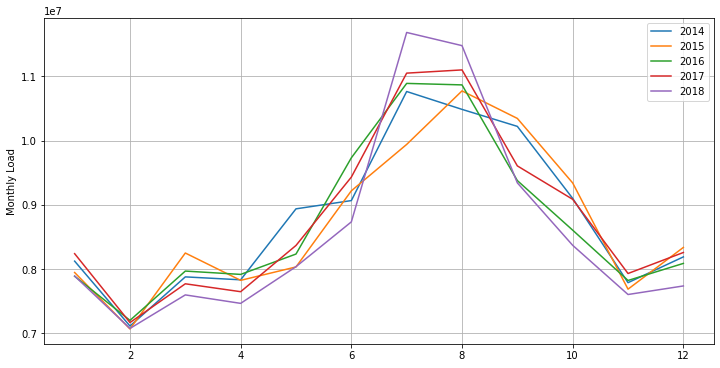

In [145]:
plot=[]
plt.figure(figsize=(12,6))
for i in range(2014,2019):
    dfi = pivot.loc[:,i]
    plot.append(plt.plot(dfi.index.values,dfi))
plt.legend([2014,2015,2016,2017,2018,2019])
plt.ylabel('Monthly Load')
plt.grid()
plt.show()